In [46]:
#pip install keras tensorflow -U

Note: you may need to restart the kernel to use updated packages.


In [48]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [49]:
df = np.loadtxt('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv', delimiter=',')

In [50]:
df

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [51]:
df.shape

(768, 9)

In [52]:
x = df[:,:8]
y = df[:,8]

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [54]:
print(f"x train shape{X_train.shape}")
print(f"y train shape{y_train.shape}")
print(f"x test shape{X_test.shape}")
print(f"y test shape{y_test.shape}")
print(f"x val shape{X_val.shape}")
print(f"y val shape{y_val.shape}")

x train shape(614, 8)
y train shape(614,)
x test shape(77, 8)
y test shape(77,)
x val shape(77, 8)
y val shape(77,)


In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [56]:
from collections import Counter
Counter(y)

Counter({0.0: 500, 1.0: 268})

In [32]:
import seaborn as sns

In [57]:
# sns.countplot(y)

In [59]:
from tensorflow.keras.models import Sequential

In [65]:
model = Sequential([
    tf.keras.layers.InputLayer(input_shape=(8,)),  
    Dense(50, activation='relu'),
    Dense(50, activation='relu'),
    Dense(50, activation='relu'),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [66]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 50)             │           450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,151 (31.84 KB)

 Trainable params: 8,151 (31.84 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [68]:
history = model.fit(x=x,y=y,epochs=300, batch_size=50,validation_data=(X_val,y_val))

Epoch 1/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6497 - loss: 17.4393 - val_accuracy: 0.5065 - val_loss: 0.7243
Epoch 2/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6243 - loss: 13.9509 - val_accuracy: 0.4156 - val_loss: 0.7164
Epoch 3/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6480 - loss: 9.4607 - val_accuracy: 0.3766 - val_loss: 0.7119
Epoch 4/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6362 - loss: 5.4205 - val_accuracy: 0.4026 - val_loss: 0.7109
Epoch 5/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6158 - loss: 1.8241 - val_accuracy: 0.4026 - val_loss: 0.7108
Epoch 6/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4644 - loss: 1.5893 - val_accuracy: 0.4286 - val_loss: 0.7085
Epoch 7/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5699 - loss: 1.1656 - val_accuracy: 0.4416 - val_loss: 0.7071
Epoch 8/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5731 - loss: 0.9215 - val_accuracy: 0.4545 

<Axes: >

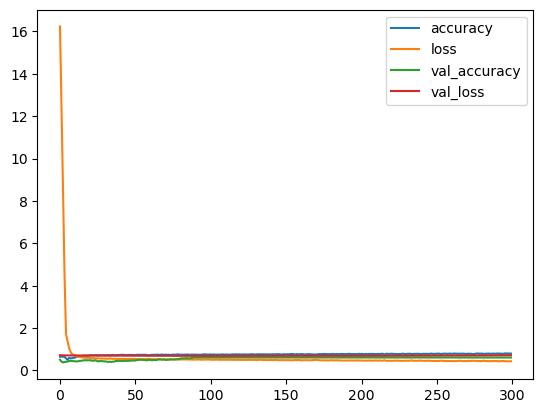

In [70]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [72]:
model.evaluate(x,y)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7686 - loss: 0.4674


[0.4407549798488617, 0.7838541865348816]

In [73]:
y_pred = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [74]:
y_pred

array([[0.28042966],
       [0.26955408],
       [0.30799264],
       [0.28225422],
       [0.38887358],
       [0.28638592],
       [0.2719024 ],
       [0.30126706],
       [0.33535504],
       [0.30557877],
       [0.31244218],
       [0.29756922],
       [0.30959606],
       [0.3079866 ],
       [0.1997333 ],
       [0.28730702],
       [0.30744028],
       [0.2856084 ],
       [0.24783593],
       [0.35466754],
       [0.35065657],
       [0.37601072],
       [0.28090718],
       [0.25135368],
       [0.28742167],
       [0.23658718],
       [0.22479439],
       [0.31273943],
       [0.32906863],
       [0.25925982],
       [0.26297486],
       [0.2726418 ],
       [0.27925432],
       [0.3178454 ],
       [0.29066288],
       [0.39844176],
       [0.39038938],
       [0.29309174],
       [0.32377437],
       [0.27750888],
       [0.23096177],
       [0.2973037 ],
       [0.33449805],
       [0.30983907],
       [0.2831897 ],
       [0.2762248 ],
       [0.3016593 ],
       [0.365

In [43]:
pip install ann_visualizer


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4183 sha256=e70c9939b7d3a04b27993e7a8b79a7218077669f880989d80495b2164b8c0cbc
  Stored in directory: c:\users\aryan\appdata\local\pip\cache\wheels\8b\79\4f\615286a2b1695b24d4170dc8a88b48d1e76aebf2d11e8817d0
Successfully built ann_visualizer


In [ ]:
pip install graphviz

In [45]:
from ann_visualizer.visualize import ann_viz
 ann_viz(model, title="")

IndentationError: unexpected indent (207493604.py, line 2)

In [ ]:
pip3 install keras
pip3 install ann_visualizer
pip install graphviz

In [ ]:
from ann_visualizer.visualize import ann_viz;

ann_viz(model, title="My first neural network")

In [ ]:
python3 index.py